## Importación de las librerías necesarias

In [32]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset de la USGS - Período 01/01/2013-Now

OBSERVACIONES:  
* La USGS (United States Geological Survey) recopila y proporciona datos sobre sismos de diversos países, no solo de Estados Unidos, entre los cuales se encuentra Japón y Perú.
* Se ha establecido un intervalo de petición de 10 días debido a que la API de la página solo permite obtener un máximo de 20,000 registros por solicitud. En algunos casos, grupos de datos de hasta 15 días contienen más de 20,000 registros, lo que provoca que la API muestre el error 400.

In [26]:
# Extracción de datos de los últimos 10 años
start_date = pd.to_datetime("2013-01-01")
end_date = pd.to_datetime(datetime.now())
interval = pd.DateOffset(days=10)
dfs = []
while start_date <= end_date:
    next_date = start_date + interval
    url = f"https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime={start_date.strftime('%Y-%m-%d')}&endtime={next_date.strftime('%Y-%m-%d')}"
    df = pd.read_csv(url).sort_values(by="time")
    dfs.append(df)
    start_date+=interval

df_usgs = pd.concat(dfs)

# P.D: El tiempo de extracción de los 10 últimos años es de aprox. 1 hora

In [27]:
df_usgs

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
2961,2013-01-01T00:08:44.056Z,64.972500,-147.353100,0.00,1.30,ml,NaN,NaN,NaN,0.2600,...,2019-05-13T22:42:25.785Z,"12 km E of Fox, Alaska",explosion,NaN,0.00,NaN,NaN,reviewed,ak,ak
2960,2013-01-01T00:10:51.379Z,40.107400,-119.676800,14.60,-0.90,ml,3.0,137.68,0.076000,0.0053,...,2018-06-29T22:31:38.899Z,"18 km NNW of Sutcliffe, Nevada",earthquake,NaN,5.50,0.29,3.0,reviewed,nn,nn
2959,2013-01-01T00:14:16.890Z,51.975000,-169.566000,87.70,2.90,ml,7.0,228.10,NaN,NaN,...,2019-05-13T22:42:39.803Z,"117 km SSW of Nikolski, Alaska",earthquake,NaN,NaN,NaN,NaN,reviewed,aeic,aeic
2958,2013-01-01T00:21:07.729Z,61.683900,-147.402100,29.70,1.60,ml,NaN,NaN,NaN,0.8100,...,2019-05-13T22:42:26.097Z,"19 km SE of Glacier View, Alaska",earthquake,NaN,0.20,NaN,NaN,reviewed,ak,ak
2957,2013-01-01T00:24:33.234Z,61.316700,-151.351100,73.30,1.30,ml,NaN,NaN,NaN,0.2300,...,2019-05-13T22:42:40.207Z,"24 km NW of Beluga, Alaska",earthquake,NaN,0.70,NaN,NaN,reviewed,ak,ak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2023-06-29T17:40:01.320Z,37.016700,-116.787600,4.00,1.10,ml,16.0,122.79,0.138000,0.1991,...,2023-06-29T17:42:02.689Z,Nevada,earthquake,NaN,1296.00,0.90,12.0,automatic,nn,nn
3,2023-06-29T17:43:26.551Z,62.942000,-151.258400,128.80,1.00,ml,NaN,NaN,NaN,0.2500,...,2023-06-29T17:45:12.496Z,"55 km NNW of Petersville, Alaska",earthquake,NaN,1.20,NaN,NaN,automatic,ak,ak
2,2023-06-29T18:00:35.750Z,38.837666,-122.814163,0.01,0.69,md,12.0,64.00,0.016680,0.0800,...,2023-06-29T18:02:10.894Z,"8km WNW of Cobb, CA",earthquake,0.27,1.07,0.07,12.0,automatic,nc,nc
1,2023-06-29T18:02:56.455Z,62.473800,-148.226900,37.40,3.80,ml,NaN,NaN,NaN,0.6100,...,2023-06-29T18:10:23.539Z,"76 km N of Chickaloon, Alaska",earthquake,NaN,1.10,NaN,NaN,automatic,ak,ak


In [28]:
# Información del Dataset, incluyendo la cantidad de nulos por columna y el número total de registros y columnas.
df_usgs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1609453 entries, 2961 to 0
Data columns (total 22 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   time             1609453 non-null  object 
 1   latitude         1609453 non-null  float64
 2   longitude        1609453 non-null  float64
 3   depth            1609451 non-null  float64
 4   mag              1606407 non-null  float64
 5   magType          1606401 non-null  object 
 6   nst              1013682 non-null  float64
 7   gap              1183379 non-null  float64
 8   dmin             1081212 non-null  float64
 9   rms              1606691 non-null  float64
 10  net              1609453 non-null  object 
 11  id               1609453 non-null  object 
 12  updated          1609453 non-null  object 
 13  place            1604264 non-null  object 
 14  type             1609453 non-null  object 
 15  horizontalError  1008492 non-null  float64
 16  depthError       1603

In [103]:
# No existen registros duplicados
df_usgs[df_usgs.duplicated(keep=False)]

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,country_estate


* Creación de una columna que contenga el nombre del país o estado

In [33]:
df_usgs["country_estate"]=df_usgs.place.apply(lambda x: x.split(", ")[-1] if pd.notnull(x) else x)

In [34]:
df_usgs.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,country_estate
2961,2013-01-01T00:08:44.056Z,64.9725,-147.3531,0.0,1.3,ml,NaN,NaN,NaN,0.2600,...,"12 km E of Fox, Alaska",explosion,NaN,0.0,NaN,NaN,reviewed,ak,ak,Alaska
2960,2013-01-01T00:10:51.379Z,40.1074,-119.6768,14.6,-0.9,ml,3.0,137.68,0.076,0.0053,...,"18 km NNW of Sutcliffe, Nevada",earthquake,NaN,5.5,0.29,3.0,reviewed,nn,nn,Nevada
2959,2013-01-01T00:14:16.890Z,51.9750,-169.5660,87.7,2.9,ml,7.0,228.10,NaN,NaN,...,"117 km SSW of Nikolski, Alaska",earthquake,NaN,NaN,NaN,NaN,reviewed,aeic,aeic,Alaska
2958,2013-01-01T00:21:07.729Z,61.6839,-147.4021,29.7,1.6,ml,NaN,NaN,NaN,0.8100,...,"19 km SE of Glacier View, Alaska",earthquake,NaN,0.2,NaN,NaN,reviewed,ak,ak,Alaska
2957,2013-01-01T00:24:33.234Z,61.3167,-151.3511,73.3,1.3,ml,NaN,NaN,NaN,0.2300,...,"24 km NW of Beluga, Alaska",earthquake,NaN,0.7,NaN,NaN,reviewed,ak,ak,Alaska


In [35]:
# Si se desea exportar como CSV
# df_usgs.to_csv("dataset_usgs_2013_now.csv",index=False)

* #### Dataset de Estados Unidos

In [37]:
# Lista de estados de E.E.U.U y sus abreviaturas
state = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'North Carolina', 'South Carolina', 'Colorado',
           'Connecticut', 'North Dakota', 'South Dakota', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois',
           'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
           'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
           'New York', 'New Mexico', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'Tennessee', 'Texas',
           'Utah', 'Vermont', 'Virginia', 'West Virginia', 'Washington', 'Wisconsin', 'Wyoming', 'District of Columbia']

abbreviation = ['AL', 'AK', 'AZ', 'AR', 'CA', 'NC', 'SC', 'CO', 'CT', 'ND', 'SD', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL',
                'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
                'NY', 'NM', 'OH', 'OK', 'OR', 'PA', 'RI', 'TN', 'TX', 'UT', 'VT', 'VA', 'WV', 'WA', 'WI', 'WY', 'DC']

In [38]:
df_usa=df_usgs[df_usgs.country_estate.apply(lambda x: pd.notnull(x) and (x in state or x in abbreviation))]
df_usa.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,country_estate
2961,2013-01-01T00:08:44.056Z,64.9725,-147.3531,0.0,1.3,ml,NaN,NaN,NaN,0.2600,...,"12 km E of Fox, Alaska",explosion,NaN,0.0,NaN,NaN,reviewed,ak,ak,Alaska
2960,2013-01-01T00:10:51.379Z,40.1074,-119.6768,14.6,-0.9,ml,3.0,137.68,0.076,0.0053,...,"18 km NNW of Sutcliffe, Nevada",earthquake,NaN,5.5,0.29,3.0,reviewed,nn,nn,Nevada
2959,2013-01-01T00:14:16.890Z,51.9750,-169.5660,87.7,2.9,ml,7.0,228.10,NaN,NaN,...,"117 km SSW of Nikolski, Alaska",earthquake,NaN,NaN,NaN,NaN,reviewed,aeic,aeic,Alaska
2958,2013-01-01T00:21:07.729Z,61.6839,-147.4021,29.7,1.6,ml,NaN,NaN,NaN,0.8100,...,"19 km SE of Glacier View, Alaska",earthquake,NaN,0.2,NaN,NaN,reviewed,ak,ak,Alaska
2957,2013-01-01T00:24:33.234Z,61.3167,-151.3511,73.3,1.3,ml,NaN,NaN,NaN,0.2300,...,"24 km NW of Beluga, Alaska",earthquake,NaN,0.7,NaN,NaN,reviewed,ak,ak,Alaska


In [39]:
# Información del dataset
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1367757 entries, 2961 to 0
Data columns (total 23 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   time             1367757 non-null  object 
 1   latitude         1367757 non-null  float64
 2   longitude        1367757 non-null  float64
 3   depth            1367755 non-null  float64
 4   mag              1364825 non-null  float64
 5   magType          1364823 non-null  object 
 6   nst              918082 non-null   float64
 7   gap              960886 non-null   float64
 8   dmin             872989 non-null   float64
 9   rms              1366314 non-null  float64
 10  net              1367757 non-null  object 
 11  id               1367757 non-null  object 
 12  updated          1367757 non-null  object 
 13  place            1367757 non-null  object 
 14  type             1367757 non-null  object 
 15  horizontalError  809292 non-null   float64
 16  depthError       1365

In [43]:
# Fecha mínima y máxima
df_usa.time.min(),df_usa.time.max()

('2013-01-01T00:08:44.056Z', '2023-06-29T18:05:03.420Z')

* #### Dataset de Japón

In [48]:
df_japan=df_usgs[df_usgs.country_estate.apply(lambda x: pd.notnull(x) and "Japan" in x)]
df_japan.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,country_estate
2914,2013-01-01T03:32:13.010Z,40.353,141.547,106.6,4.3,mb,42.0,133.6,NaN,0.91,...,"16 km SSE of Hachinohe, Japan",earthquake,NaN,5.4,NaN,17.0,reviewed,us,us,Japan
2854,2013-01-01T09:19:16.080Z,26.997,127.380,92.8,4.7,mb,95.0,69.6,NaN,0.67,...,"73 km NW of Nago, Japan",earthquake,NaN,3.5,NaN,43.0,reviewed,us,us,Japan
2610,2013-01-02T10:31:02.520Z,29.344,142.216,35.0,4.8,mb,62.0,67.6,NaN,0.97,...,"Izu Islands, Japan region",earthquake,NaN,NaN,NaN,14.0,reviewed,us,us,Japan region
2592,2013-01-02T12:00:12.310Z,42.159,143.314,68.5,4.2,mb,43.0,136.5,NaN,1.20,...,"80 km ESE of Shizunai-furukawach?, Japan",earthquake,NaN,6.6,NaN,3.0,reviewed,us,us,Japan
2516,2013-01-02T20:31:04.080Z,33.461,141.905,5.3,4.5,mb,31.0,135.1,NaN,1.10,...,"237 km SE of Katsuura, Japan",earthquake,NaN,31.5,NaN,5.0,reviewed,us,us,Japan


In [49]:
# Información del dataset
df_japan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11398 entries, 2914 to 262
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             11398 non-null  object 
 1   latitude         11398 non-null  float64
 2   longitude        11398 non-null  float64
 3   depth            11398 non-null  float64
 4   mag              11398 non-null  float64
 5   magType          11398 non-null  object 
 6   nst              1886 non-null   float64
 7   gap              11397 non-null  float64
 8   dmin             10830 non-null  float64
 9   rms              11398 non-null  float64
 10  net              11398 non-null  object 
 11  id               11398 non-null  object 
 12  updated          11398 non-null  object 
 13  place            11398 non-null  object 
 14  type             11398 non-null  object 
 15  horizontalError  9564 non-null   float64
 16  depthError       11292 non-null  float64
 17  magError   

In [54]:
# Fecha mínima y máxima
df_japan.time.min(),df_japan.time.max()

('2013-01-01T03:32:13.010Z', '2023-06-28T17:08:10.853Z')

* #### Dataset de Perú

In [52]:
df_peru=df_usgs[df_usgs.country_estate.apply(lambda x: pd.notnull(x) and "Peru" in x)]
df_peru.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,country_estate
1380,2013-01-06T14:34:56.870Z,-17.622,-72.014,74.7,4.7,mb,35.0,95.4,NaN,1.33,...,"55 km SSW of Punta de Bombón, Peru",earthquake,NaN,9.1,NaN,3.0,reviewed,us,us,Peru
373,2013-01-09T18:38:45.120Z,-18.011,-69.451,123.9,5.0,mb,201.0,84.8,NaN,1.14,...,"59 km ESE of Palca, Peru",earthquake,NaN,NaN,NaN,135.0,reviewed,us,us,Peru
1589,2013-01-15T22:34:50.000Z,-5.740,-80.660,40.0,4.6,mb,97.0,64.8,NaN,NaN,...,"27 km SE of Sechura, Peru",earthquake,NaN,NaN,NaN,59.0,reviewed,lim,us,Peru
1564,2013-01-16T00:07:42.780Z,-15.098,-70.802,57.1,4.6,mb,118.0,80.9,NaN,0.77,...,"11 km E of Ocuviri, Peru",earthquake,NaN,6.0,NaN,87.0,reviewed,us,us,Peru
1545,2013-01-16T01:29:22.110Z,-15.864,-71.815,35.0,4.6,mb,17.0,153.4,NaN,1.21,...,"25 km SSW of Maca, Peru",earthquake,NaN,NaN,NaN,2.0,reviewed,us,us,Peru


In [53]:
# Información del dataset
df_peru.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2579 entries, 1380 to 694
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             2579 non-null   object 
 1   latitude         2579 non-null   float64
 2   longitude        2579 non-null   float64
 3   depth            2579 non-null   float64
 4   mag              2579 non-null   float64
 5   magType          2579 non-null   object 
 6   nst              432 non-null    float64
 7   gap              2448 non-null   float64
 8   dmin             2330 non-null   float64
 9   rms              2562 non-null   float64
 10  net              2579 non-null   object 
 11  id               2579 non-null   object 
 12  updated          2579 non-null   object 
 13  place            2579 non-null   object 
 14  type             2579 non-null   object 
 15  horizontalError  2211 non-null   float64
 16  depthError       2544 non-null   float64
 17  magError    

In [55]:
# Fecha mínima y máxima
df_peru.time.min(),df_peru.time.max()

('2013-01-06T14:34:56.870Z', '2023-06-25T13:26:53.948Z')

* ### Boxplots: Visualización de outliers de las principales variables numéricas

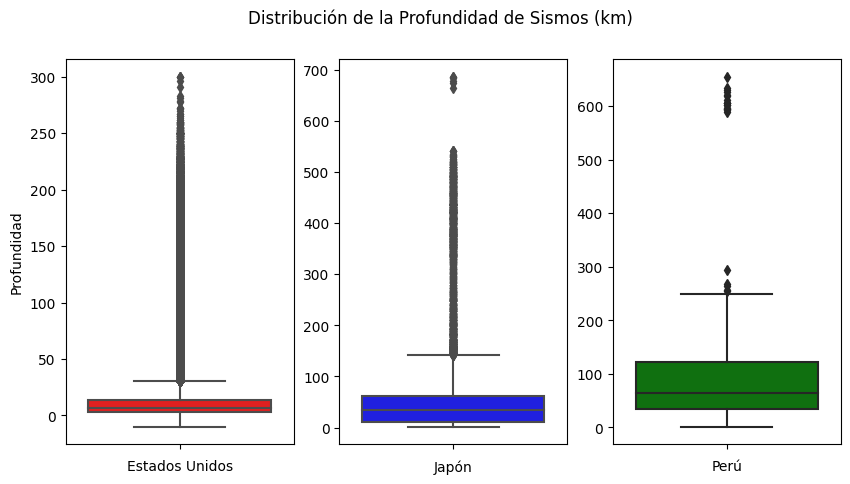

In [76]:
# Profundidad del Sismo

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
fig.suptitle("Distribución de la Profundidad de Sismos (km)")

sns.boxplot(y="depth", data=df_usa, ax=ax[0], color="red")
ax[0].set_ylabel("Profundidad")
ax[0].set_xlabel("Estados Unidos")

sns.boxplot(y="depth", data=df_japan, ax=ax[1], color="blue")
ax[1].set_ylabel("")
ax[1].set_xlabel("Japón")

sns.boxplot(y="depth", data=df_peru, ax=ax[2], color="green")
ax[2].set_ylabel("")
ax[2].set_xlabel("Perú");

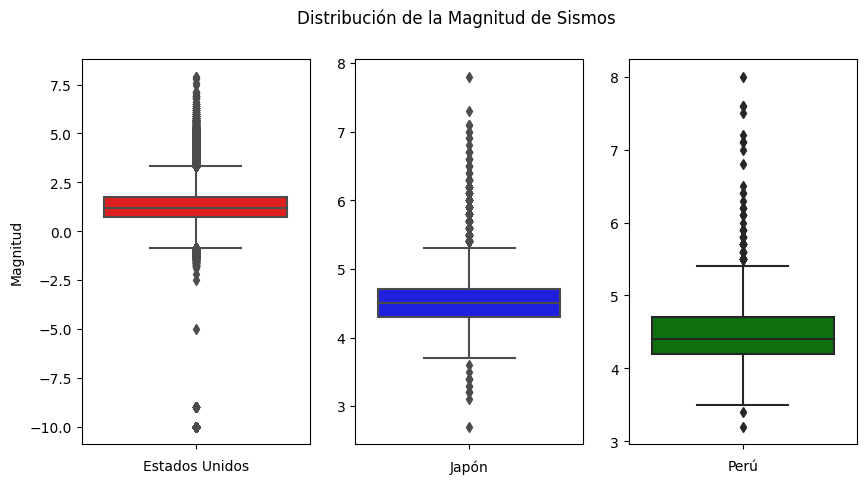

In [77]:
# Magnitud del Sismo

fig,ax=plt.subplots(1,3,figsize=(10,5))
fig.suptitle("Distribución de la Magnitud de Sismos")

sns.boxplot(y="mag",data=df_usa,ax=ax[0],color="red")
ax[0].set_ylabel("Magnitud")
ax[0].set_xlabel("Estados Unidos")

sns.boxplot(y="mag",data=df_japan,ax=ax[1],color="blue")
ax[1].set_ylabel("")
ax[1].set_xlabel("Japón")

sns.boxplot(y="mag",data=df_peru,ax=ax[2],color="green")
ax[2].set_ylabel("")
ax[2].set_xlabel("Perú");

* ### Barplot (Gráfico de Barras)

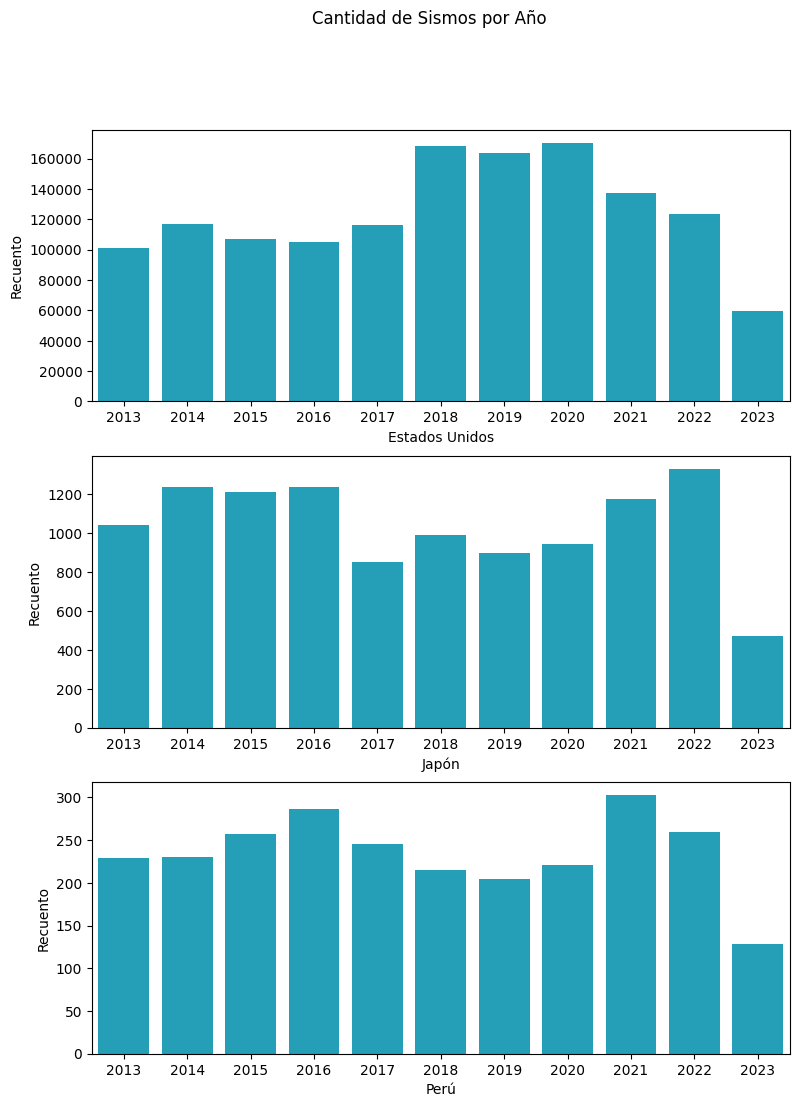

In [98]:
# Cantidad de Sismos

count_usa=df_usa.groupby(pd.to_datetime(df_usa.time).dt.year).size()
count_japan=df_japan.groupby(pd.to_datetime(df_japan.time).dt.year).size()
count_peru=df_peru.groupby(pd.to_datetime(df_peru.time).dt.year).size()

fig,ax=plt.subplots(3,1,figsize=(9,12))
fig.suptitle("Cantidad de Sismos por Año")

sns.barplot(x=count_usa.index,y=count_usa,color="#0bb0d0",ax=ax[0])
ax[0].set_ylabel("Recuento")
ax[0].set_xlabel("Estados Unidos")

sns.barplot(x=count_japan.index,y=count_japan,color="#0bb0d0",ax=ax[1])
ax[1].set_ylabel("Recuento")
ax[1].set_xlabel("Japón")

sns.barplot(x=count_peru.index,y=count_peru,color="#0bb0d0",ax=ax[2])
ax[2].set_ylabel("Recuento")
ax[2].set_xlabel("Perú");

## Dataset de Perú (IGP) - Período 1960 - 2023

In [102]:
end_time=pd.to_datetime(datetime.now())
df_peru2=pd.read_excel(f"https://ultimosismo.igp.gob.pe/datos-sismicos-xls/01-01-1960/{end_time.strftime('%d-%m-%Y')}/-25.701/-1.396/-87.382/-65.624/2/1/9/0/900")
df_peru2

c:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,fecha UTC,hora UTC,latitud (º),longitud (º),profundidad (km),magnitud (M)
0,13/01/1960,15:40:34.00,-16.145,-72.144,60,7.5
1,15/01/1960,09:30:24.00,-15.000,-75.000,70,7.0
2,17/01/1960,02:57:58.00,-14.500,-74.500,150,6.4
3,23/01/1960,03:37:32.00,-12.500,-68.500,300,5.8
4,30/01/1960,05:07:24.00,-5.500,-77.500,100,5.7
...,...,...,...,...,...,...
23427,27/12/2022,14:38:09,-11.540,-76.920,89,4.1
23428,23/2/2023,06:18:04,-8.690,-77.810,15,4.3
23429,3/3/2023,19:39:13,-6.890,-80.230,43,4.3
23430,27/3/2023,20:13:13,-10.530,-74.700,134,4.6


In [104]:
# Existen duplicados
df_peru2[df_peru2.duplicated(keep=False)]

,fecha UTC,hora UTC,latitud (º),longitud (º),profundidad (km),magnitud (M)
23185,16/12/2022,05:56:51,-11.42,-76.34,18,4.8
23186,16/12/2022,10:23:48,-7.24,-80.96,20,5.1
23196,27/12/2022,14:38:09,-11.54,-76.92,89,4.1
23425,16/12/2022,05:56:51,-11.42,-76.34,18,4.8
23426,16/12/2022,10:23:48,-7.24,-80.96,20,5.1
23427,27/12/2022,14:38:09,-11.54,-76.92,89,4.1


In [105]:
# Información del dataset
df_peru2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23432 entries, 0 to 23431
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fecha UTC         23432 non-null  object 
 1   hora UTC          23432 non-null  object 
 2   latitud (º)       23432 non-null  float64
 3   longitud (º)      23432 non-null  float64
 4   profundidad (km)  23432 non-null  int64  
 5   magnitud (M)      23432 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.1+ MB


* ### Boxplots: Variables Profundidad y Magnitud del Sismo

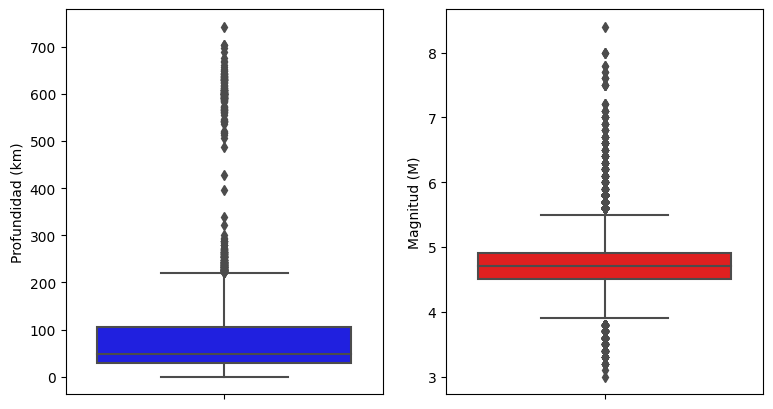

In [108]:
fig,ax=plt.subplots(1,2,figsize=(9,5))

sns.boxplot(y="profundidad (km)",data=df_peru2,ax=ax[0],color="blue")
ax[0].set_ylabel("Profundidad (km)")

sns.boxplot(y="magnitud (M)",data=df_peru2,ax=ax[1],color="red")
ax[1].set_ylabel("Magnitud (M)");

* ### Barplot (Gráfico de Barras)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11352\2360047526.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  count_peru2=df_peru2.groupby(pd.to_datetime(df_peru2["fecha UTC"]).dt.year).size()


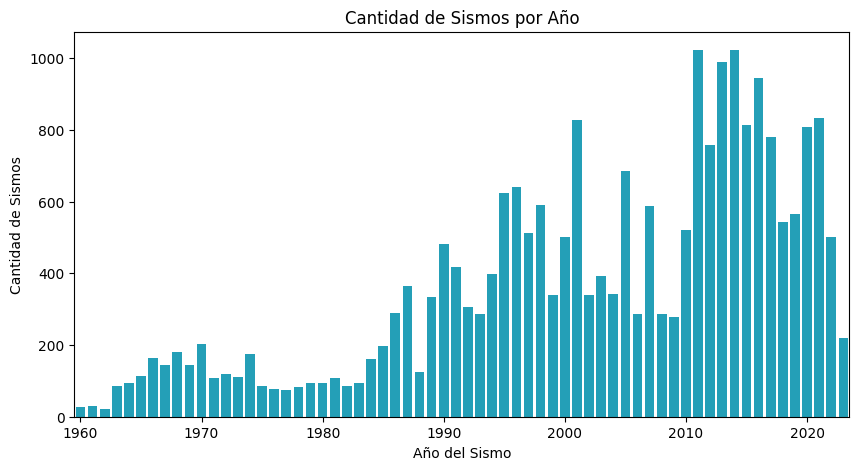

In [110]:
count_peru2=df_peru2.groupby(pd.to_datetime(df_peru2["fecha UTC"]).dt.year).size()
plt.figure(figsize=(10,5))
plt.title("Cantidad de Sismos por Año")
sns.barplot(x=count_peru2.index,y=count_peru2,color="#0bb0d0")
plt.xticks(range(0,len(count_peru2.index),10),count_peru2.index[::10])
plt.xlabel("Año del Sismo")
plt.ylabel("Cantidad de Sismos");